In [1]:
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree


import pandas as pd
from pyspark.sql import SparkSession
import pyspark.pandas as ps

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import dtreeviz # remember to load the package

c:\Users\nikgo\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyspark\pandas\__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


In [2]:
!python test_for_cls.py -v

test_par (__main__.full_test.test_par) ... ERROR

ERROR: test_par (__main__.full_test.test_par)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "c:\Users\nikgo\Documents\NSU\Theory_of_stat_decisions\Theory_of_stat_decisions\lab03\test_for_cls.py", line 25, in test_par
    self.assertNotEqual(gender_parce(1, df), df_t)
  File "c:\Users\nikgo\AppData\Local\Programs\Python\Python311\Lib\unittest\case.py", line 879, in assertNotEqual
    if not first != second:
           ^^^^^^^^^^^^^^^
  File "c:\Users\nikgo\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\generic.py", line 1466, in __nonzero__
    raise ValueError(
ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

----------------------------------------------------------------------
Ran 1 test in 0.042s

FAILED (errors=1)


In [3]:
df = pd.read_csv('./data/survey.csv')
df = df.drop(columns=['state', 'Country', 'Timestamp', 'comments', 'no_employees'])

uniq = df['Gender'].unique()
dict_fot_col = {}
for var in uniq:
    if var[0] == 'm' or var[0] == 'M':
        dict_fot_col[var] = 'M'
    else:
        dict_fot_col[var] = 'F'

df['Gender'] = df['Gender'].map(dict_fot_col)
df = df.dropna()

#df['Gender'] = gender_parce(df.shape[0], df['Gender'])
print(df)

      Age Gender self_employed family_history treatment work_interfere   
18     46      M           Yes            Yes        No      Sometimes  \
20     29      M            No            Yes       Yes      Sometimes   
21     31      M           Yes             No        No          Never   
22     46      M            No             No       Yes          Often   
23     41      M            No             No       Yes          Never   
...   ...    ...           ...            ...       ...            ...   
1252   29      M            No            Yes       Yes      Sometimes   
1253   36      M            No            Yes        No         Rarely   
1255   32      M            No            Yes       Yes          Often   
1256   34      M            No            Yes       Yes      Sometimes   
1258   25      M            No            Yes       Yes      Sometimes   

     remote_work tech_company    benefits care_options  ...   anonymity   
18           Yes          Yes       

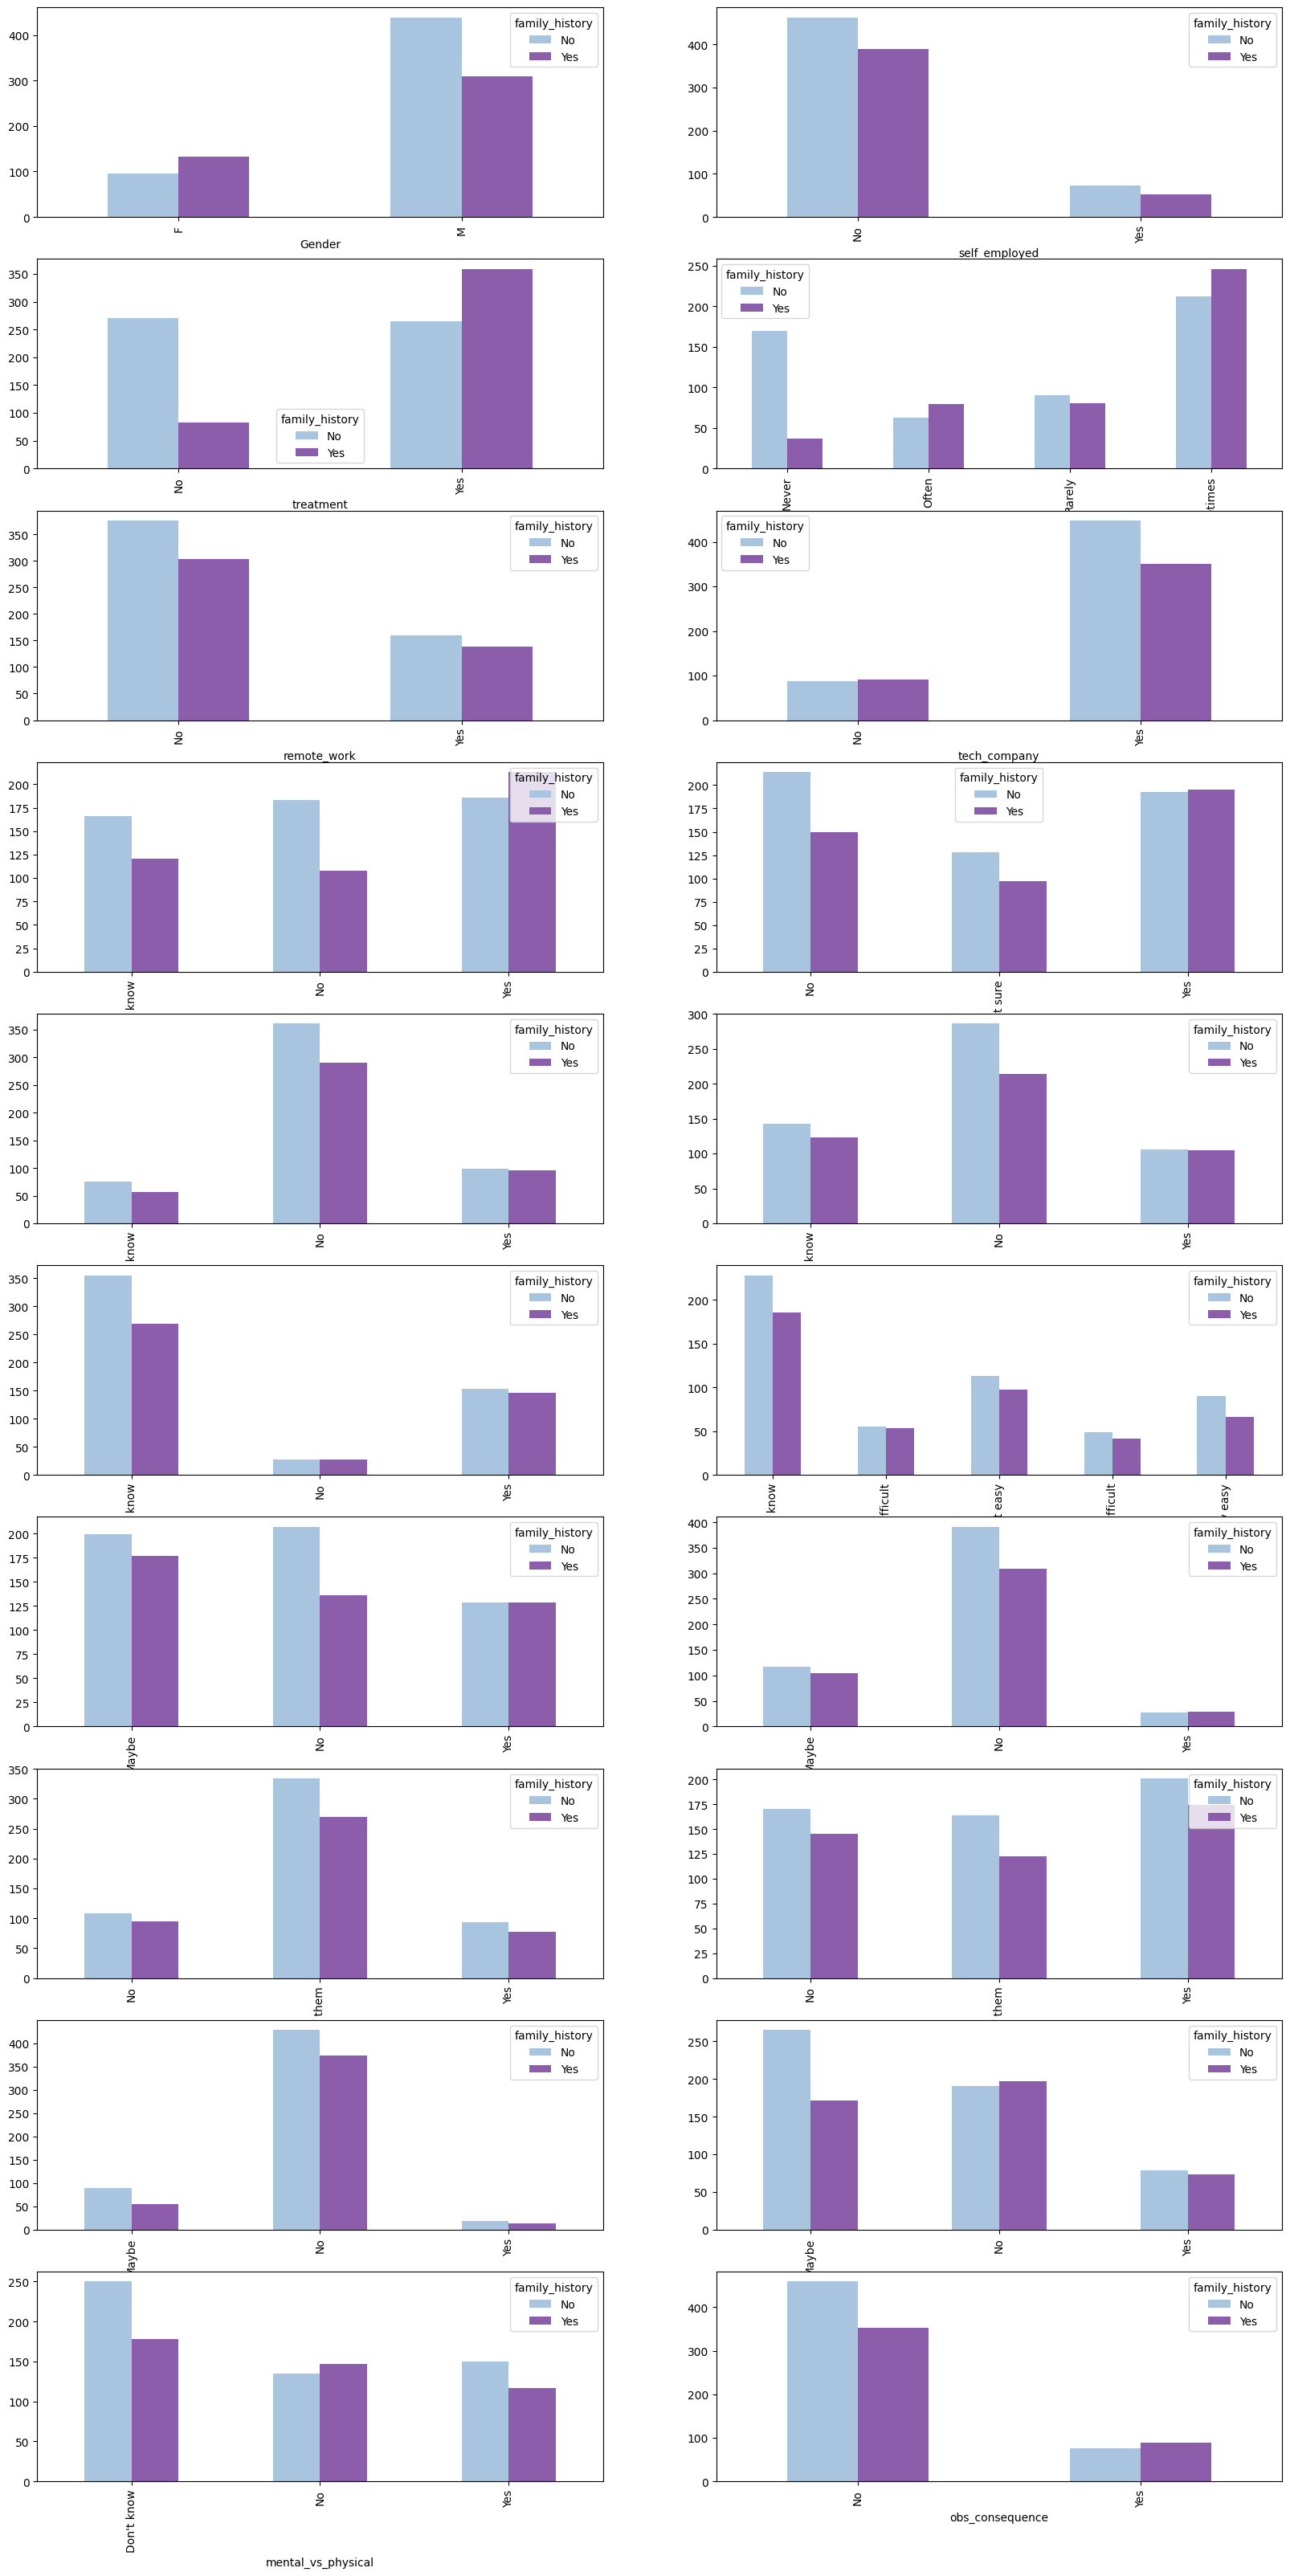

In [4]:
df_for_img = pd.DataFrame()
columns = list(df.drop(['family_history', 'Age'], axis = 1))
fig, axes = plt.subplots(10, 2, figsize=(20, 40))
for i, col in enumerate(columns):
    df_f = df.groupby(col)['family_history'].value_counts().unstack()
    df_f.plot.bar(ax=axes[i//2, i%2], color = sns.color_palette("BuPu", 2))
    df_f = df_f.rename(index=lambda x: df_f.index.name + '_' + x )
    df_for_img =  pd.concat([df_for_img, df_f])
plt.show()

<h4>My target - "famili_history"</h4>
<p>I would like to predict is thare another members of family, how got mental illnes<p>
<p>Let's see, how does data here look</p>
<p> 1 - Yes, 0 - No</p>

In [5]:
# Let's Encod data
encoder = LabelEncoder()
colmn = df.columns
for index, name in enumerate(colmn):
    df[name] = encoder.fit_transform(df[name].values)

In [6]:
df.corr()

,Age,Gender,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
Age,1.000000,0.111911,0.056169,-0.009403,0.052979,-0.021069,0.140021,-0.026845,0.157036,0.124909,...,0.038472,-0.013951,0.012334,-0.073413,-0.006991,0.010155,0.080297,-0.004937,-0.019093,0.071090
Gender,0.111911,1.000000,0.016629,-0.142716,-0.189823,-0.098208,0.009701,0.083117,-0.121523,-0.127768,...,-0.040153,0.047353,0.001037,0.044620,0.044971,0.069371,-0.078351,-0.032912,-0.037205,-0.105286
self_employed,0.056169,0.016629,1.000000,-0.021860,-0.018092,-0.013891,0.338583,0.077589,-0.082432,0.024212,...,0.075766,0.162032,0.027306,0.031012,0.069901,0.037743,-0.012525,0.006233,0.124467,0.080886
family_history,-0.009403,-0.142716,-0.021860,1.000000,0.328335,0.234411,0.018684,-0.055789,0.102393,0.080060,...,0.054112,-0.012818,0.013901,-0.001438,-0.008398,0.004553,0.048658,0.085552,0.029429,0.078783
treatment,0.052979,-0.189823,-0.018092,0.328335,1.000000,0.413105,0.021614,-0.045888,0.203983,0.203285,...,0.162318,0.046715,-0.001698,-0.019477,0.087725,0.004267,0.107058,0.100756,0.053653,0.111560
work_interfere,-0.021069,-0.098208,-0.013891,0.234411,0.413105,1.000000,0.023787,0.013525,0.052437,0.085642,...,0.068279,0.021952,0.026841,-0.048033,0.001087,-0.078030,0.097220,0.008752,0.030658,0.071544
remote_work,0.140021,0.009701,0.338583,0.018684,0.021614,0.023787,1.000000,0.134149,-0.064710,0.004258,...,0.002751,0.105960,0.030681,-0.016168,0.092690,0.057555,-0.026320,-0.015666,0.045978,-0.031612
tech_company,-0.026845,0.083117,0.077589,-0.055789,-0.045888,0.013525,0.134149,1.000000,-0.033845,-0.013992,...,-0.049974,0.044467,-0.031623,0.067941,0.069398,0.031421,-0.022096,-0.014461,0.014962,-0.070342
benefits,0.157036,-0.121523,-0.082432,0.102393,0.203983,0.052437,-0.064710,-0.033845,1.000000,0.464348,...,0.329791,0.037924,-0.040986,-0.024626,0.011313,0.039902,0.014602,0.020001,0.121430,0.056232
care_options,0.124909,-0.127768,0.024212,0.080060,0.203285,0.085642,0.004258,-0.013992,0.464348,1.000000,...,0.361638,0.133529,0.004248,0.046348,0.044932,0.096816,0.022137,0.045417,0.150911,0.077715


<Axes: >

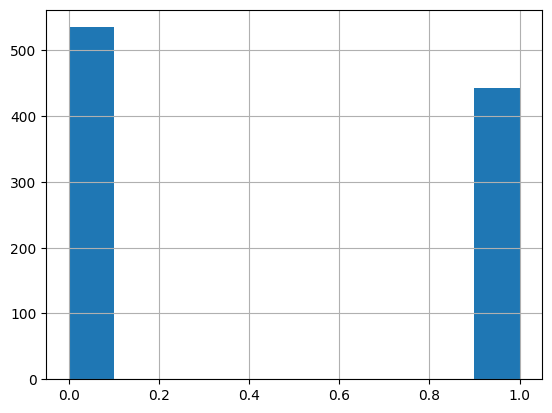

In [7]:
df['family_history'].hist()

<h4>Deciosion tree</h4>

In [8]:
# there are literli function plot_tree to visualize that

X = df.drop(columns='family_history')
y = pd.DataFrame(df['family_history'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier()
model = clf.fit(X, y)

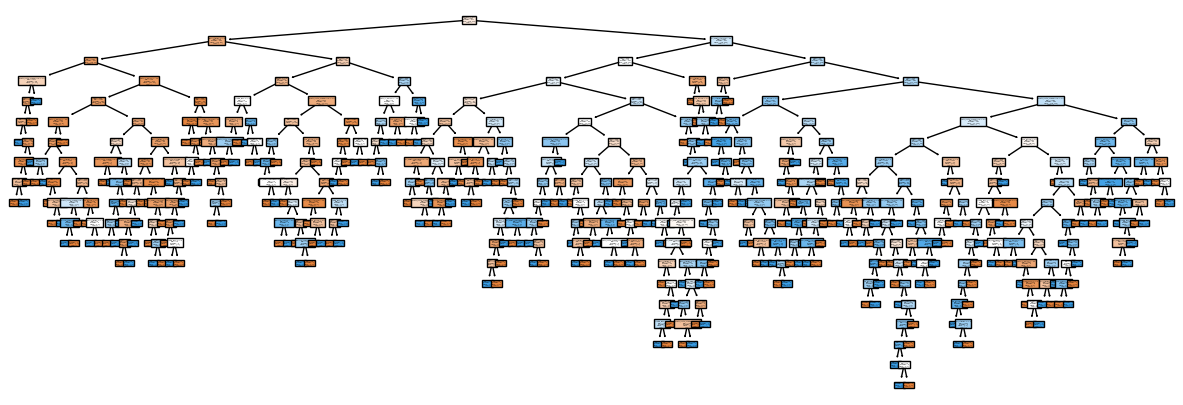

In [14]:
fig = plt.figure(figsize=(15, 5))
_ = tree.plot_tree(clf, 
                   feature_names=X.columns,  
                   class_names='family_history',
                   filled=True)

<h3>Boosting</h3>